In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Previous analysis

In [2]:
first_features_path = '../results/first_features.csv'
df_first = pd.read_csv(first_features_path, index_col=0)

In [3]:
df_first

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
ACTB_B2_CA,0.565407,0.840889,8,11.673097,16.213742,10.770630,13.984421,0.970518,4.760655e-02,361,...,52.878741,41.120166,48.257370,36.644488,0.927928,0.043215,1802,5,3.129856,0.344300
ACTN4_L3_NO,0.609500,0.792442,2,5.328427,0.707107,4.621320,0.535534,0.868272,1.471863e-02,508,...,47.255239,39.149942,43.360854,35.325742,0.931571,0.038830,2192,5,3.118157,0.329785
ACTB_B2_NS,0.520201,1.180266,2,6.621320,4.535534,5.914214,4.363961,0.872069,6.171910e-02,348,...,53.959471,37.068198,49.859051,33.706782,0.934128,0.037040,1796,5,3.131960,0.340088
NegsiRNA_B1_NO,0.533401,1.085025,3,2.276142,1.863171,2.179106,1.696244,0.978017,3.807501e-02,414,...,48.077945,34.733603,44.352302,31.529210,0.933158,0.040496,2281,5,3.140289,0.359689
NegsiRNA_B1_CA,0.642460,0.749550,5,25.802439,24.656564,23.709567,23.061234,0.897672,1.110010e-01,291,...,56.071651,43.039807,51.510078,39.414717,0.926734,0.048636,1637,6,3.149053,0.372899
AKAP5_B2_CA,0.570393,0.953002,2,12.035534,5.363961,11.374260,5.315302,0.939998,2.269842e-02,248,...,64.190750,44.709929,58.973009,40.259713,0.930517,0.035326,1405,5,3.128114,0.338449
NegsiRNA_A2_NS,0.646834,0.748581,3,1.666667,0.577350,1.666667,0.577350,1.000000,0.000000e+00,436,...,49.766107,37.235494,45.775260,33.715701,0.931461,0.038812,2102,5,3.132731,0.340683
NegsiRNA_A2b_NS,0.574876,0.894699,32,2.524049,2.165192,2.423873,1.967435,0.976890,3.554007e-02,381,...,51.306721,39.168511,47.201711,35.605468,0.928869,0.044839,2049,5,3.138116,0.358888
AKT1_B1_CA,0.657028,0.561268,9,7.923745,6.449575,7.675348,6.262999,0.976414,2.877320e-02,237,...,60.208615,44.408546,55.143431,40.105346,0.927828,0.048078,1271,5,3.143194,0.361327
ADAM9_C2_NO,0.623052,0.844729,15,7.826465,9.653192,7.121741,8.698161,0.940723,6.570897e-02,625,...,38.854769,32.051141,35.529259,28.633922,0.928395,0.050198,3107,5,3.151915,0.379001


In [4]:
df_first_0 = df_first.fillna(0)
df_first_0

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
ACTB_B2_CA,0.565407,0.840889,8,11.673097,16.213742,10.770630,13.984421,0.970518,4.760655e-02,361,...,52.878741,41.120166,48.257370,36.644488,0.927928,0.043215,1802,5,3.129856,0.344300
ACTN4_L3_NO,0.609500,0.792442,2,5.328427,0.707107,4.621320,0.535534,0.868272,1.471863e-02,508,...,47.255239,39.149942,43.360854,35.325742,0.931571,0.038830,2192,5,3.118157,0.329785
ACTB_B2_NS,0.520201,1.180266,2,6.621320,4.535534,5.914214,4.363961,0.872069,6.171910e-02,348,...,53.959471,37.068198,49.859051,33.706782,0.934128,0.037040,1796,5,3.131960,0.340088
NegsiRNA_B1_NO,0.533401,1.085025,3,2.276142,1.863171,2.179106,1.696244,0.978017,3.807501e-02,414,...,48.077945,34.733603,44.352302,31.529210,0.933158,0.040496,2281,5,3.140289,0.359689
NegsiRNA_B1_CA,0.642460,0.749550,5,25.802439,24.656564,23.709567,23.061234,0.897672,1.110010e-01,291,...,56.071651,43.039807,51.510078,39.414717,0.926734,0.048636,1637,6,3.149053,0.372899
AKAP5_B2_CA,0.570393,0.953002,2,12.035534,5.363961,11.374260,5.315302,0.939998,2.269842e-02,248,...,64.190750,44.709929,58.973009,40.259713,0.930517,0.035326,1405,5,3.128114,0.338449
NegsiRNA_A2_NS,0.646834,0.748581,3,1.666667,0.577350,1.666667,0.577350,1.000000,0.000000e+00,436,...,49.766107,37.235494,45.775260,33.715701,0.931461,0.038812,2102,5,3.132731,0.340683
NegsiRNA_A2b_NS,0.574876,0.894699,32,2.524049,2.165192,2.423873,1.967435,0.976890,3.554007e-02,381,...,51.306721,39.168511,47.201711,35.605468,0.928869,0.044839,2049,5,3.138116,0.358888
AKT1_B1_CA,0.657028,0.561268,9,7.923745,6.449575,7.675348,6.262999,0.976414,2.877320e-02,237,...,60.208615,44.408546,55.143431,40.105346,0.927828,0.048078,1271,5,3.143194,0.361327
ADAM9_C2_NO,0.623052,0.844729,15,7.826465,9.653192,7.121741,8.698161,0.940723,6.570897e-02,625,...,38.854769,32.051141,35.529259,28.633922,0.928395,0.050198,3107,5,3.151915,0.379001


In [5]:
data_first = df_first_0.to_numpy()
first_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
first_pipe.fit(data_first)
first_pca = first_pipe.named_steps['pca']

In [6]:
first_pca.explained_variance_ratio_

array([0.29551387, 0.21005441, 0.14921015, 0.10810667, 0.05499156,
       0.04504297, 0.04069943, 0.02455737, 0.02157973, 0.01451388])

In [7]:
first_pca.singular_values_

array([12.63239848, 10.65032299,  8.9762733 ,  7.64052355,  5.44935228,
        4.93185609,  4.68803729,  3.64156255,  3.41365726,  2.79955258])

<IPython.core.display.Javascript object>


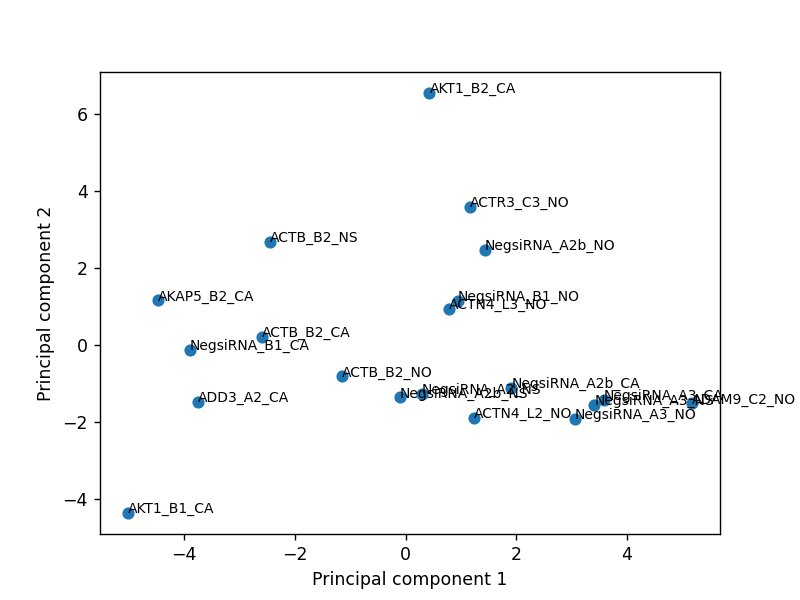

In [8]:
first_pca_array = first_pipe.transform(data_first)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(first_pca_array[:, 0], first_pca_array[:, 1])

labels = list(df_first.index)

for index, label in enumerate(labels):
    ax.text(first_pca_array[index, 0], first_pca_array[index, 1], label, fontsize=8)
    

# NegsiRNA images

In [9]:
negsi_features_path = '../results/NegsiRNA_features.csv'
df_negsi = pd.read_csv(negsi_features_path, index_col=0)

In [10]:
df_negsi

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,69.758472,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,55.310388,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116
NegsiRNA_E3_NO,0.583298,0.893483,0,NaN,NaN,NaN,NaN,NaN,NaN,446,...,48.109712,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,52.991063,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,56.647236,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,55.008710,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,52.290949,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572
NegsiRNA_I2_CA,0.600133,0.941587,0,NaN,NaN,NaN,NaN,NaN,NaN,507,...,42.572094,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,59.548758,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654


In [12]:
df_negsi_0 = df_negsi.fillna(0)
df_negsi_0

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,69.758472,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,55.310388,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116
NegsiRNA_E3_NO,0.583298,0.893483,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,446,...,48.109712,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,52.991063,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,56.647236,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,55.008710,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,52.290949,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572
NegsiRNA_I2_CA,0.600133,0.941587,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507,...,42.572094,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,59.548758,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654


In [13]:
data_negsi = df_negsi_0.to_numpy()
negsi_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
negsi_pipe.fit(data_negsi)
negsi_pca = negsi_pipe.named_steps['pca']

In [26]:
negsi_pca.explained_variance_ratio_

array([0.28410855, 0.16181593, 0.12472383, 0.08084941, 0.06942668,
       0.0529262 , 0.04032134, 0.03606422, 0.03061637, 0.02191942])

In [15]:
negsi_pca.singular_values_

array([27.97203868, 21.11021259, 18.53346786, 14.92177158, 13.82754803,
       12.07305918, 10.53778839,  9.96598496,  9.18245571,  7.76956086])

<IPython.core.display.Javascript object>


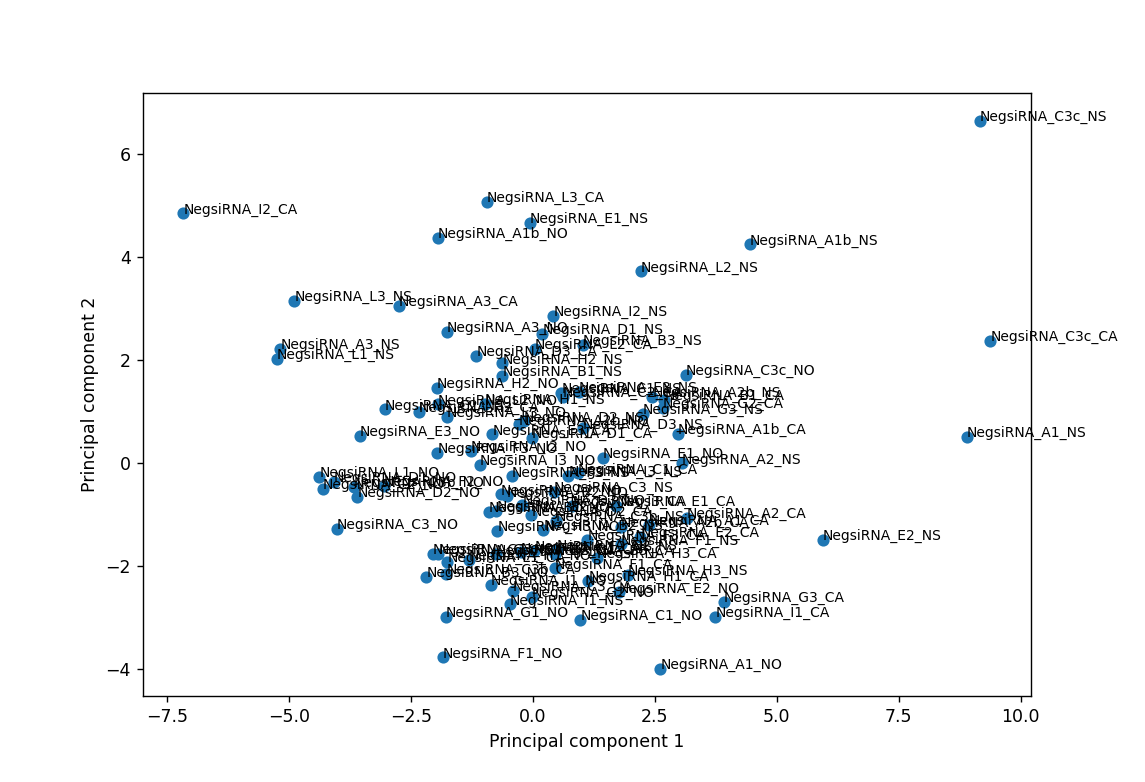

In [16]:
negsi_pca_array = negsi_pipe.transform(data_negsi)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(negsi_pca_array[:, 0], negsi_pca_array[:, 1])

labels = list(df_negsi.index)

for index, label in enumerate(labels):
    ax.text(negsi_pca_array[index, 0], negsi_pca_array[index, 1], label, fontsize=8)

# All data

In [17]:
df_first_nonegsi = df_first.loc[~df_first.index.str.startswith("Negsi")]
df_all = pd.concat([df_first_nonegsi, df_negsi])
df_all

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
ACTB_B2_CA,0.565407,0.840889,8,11.673097,16.213742,10.770630,13.984421,0.970518,0.047607,361,...,52.878741,41.120166,48.257370,36.644488,0.927928,0.043215,1802,5,3.129856,0.344300
ACTN4_L3_NO,0.609500,0.792442,2,5.328427,0.707107,4.621320,0.535534,0.868272,0.014719,508,...,47.255239,39.149942,43.360854,35.325742,0.931571,0.038830,2192,5,3.118157,0.329785
ACTB_B2_NS,0.520201,1.180266,2,6.621320,4.535534,5.914214,4.363961,0.872069,0.061719,348,...,53.959471,37.068198,49.859051,33.706782,0.934128,0.037040,1796,5,3.131960,0.340088
AKAP5_B2_CA,0.570393,0.953002,2,12.035534,5.363961,11.374260,5.315302,0.939998,0.022698,248,...,64.190750,44.709929,58.973009,40.259713,0.930517,0.035326,1405,5,3.128114,0.338449
AKT1_B1_CA,0.657028,0.561268,9,7.923745,6.449575,7.675348,6.262999,0.976414,0.028773,237,...,60.208615,44.408546,55.143431,40.105346,0.927828,0.048078,1271,5,3.143194,0.361327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,55.008710,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,52.290949,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572
NegsiRNA_I2_CA,0.600133,0.941587,0,NaN,NaN,NaN,NaN,NaN,NaN,507,...,42.572094,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,59.548758,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654


In [19]:
data_all = df_all.fillna(0).to_numpy()
all_pipe = make_pipeline(StandardScaler(), PCA(n_components=10))
all_pipe.fit(data_all)
all_pca = all_pipe.named_steps['pca']

In [20]:
all_pca.explained_variance_ratio_

array([0.27697612, 0.16518893, 0.12639016, 0.07878055, 0.07141504,
       0.05044228, 0.03889232, 0.03594023, 0.03164311, 0.02256973])

In [50]:
loadings = pd.DataFrame(all_pca.components_[:4, :].T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_all.columns)
loadings

,PC1,PC2,PC3,PC4
cell_area_ratio,0.045924,-0.082921,-0.109087,-0.208647
white_area_ratio,-0.127237,-0.353798,0.071048,0.187416
e2e_n,-0.070517,0.122195,0.126730,-0.262989
e2e_distance_mean,0.001320,-0.132821,0.426909,-0.038421
e2e_distance_std,-0.009992,0.003241,0.470375,-0.127386
e2e_eu_distance_mean,0.001127,-0.132010,0.426357,-0.033037
e2e_eu_distance_std,-0.009983,0.001179,0.470319,-0.121032
e2e_distance_ratio_mean,0.036389,-0.015744,0.129284,-0.333584
e2e_distance_ratio_std,-0.019208,0.101358,0.186447,-0.241972
j2e_n,-0.291807,0.074452,-0.028283,0.047955


In [21]:
all_pca.singular_values_

array([29.06981481, 22.44975333, 19.63711726, 15.50353076, 14.76100566,
       12.40561939, 10.89313912, 10.47156303,  9.82563639,  8.29820737])

<IPython.core.display.Javascript object>


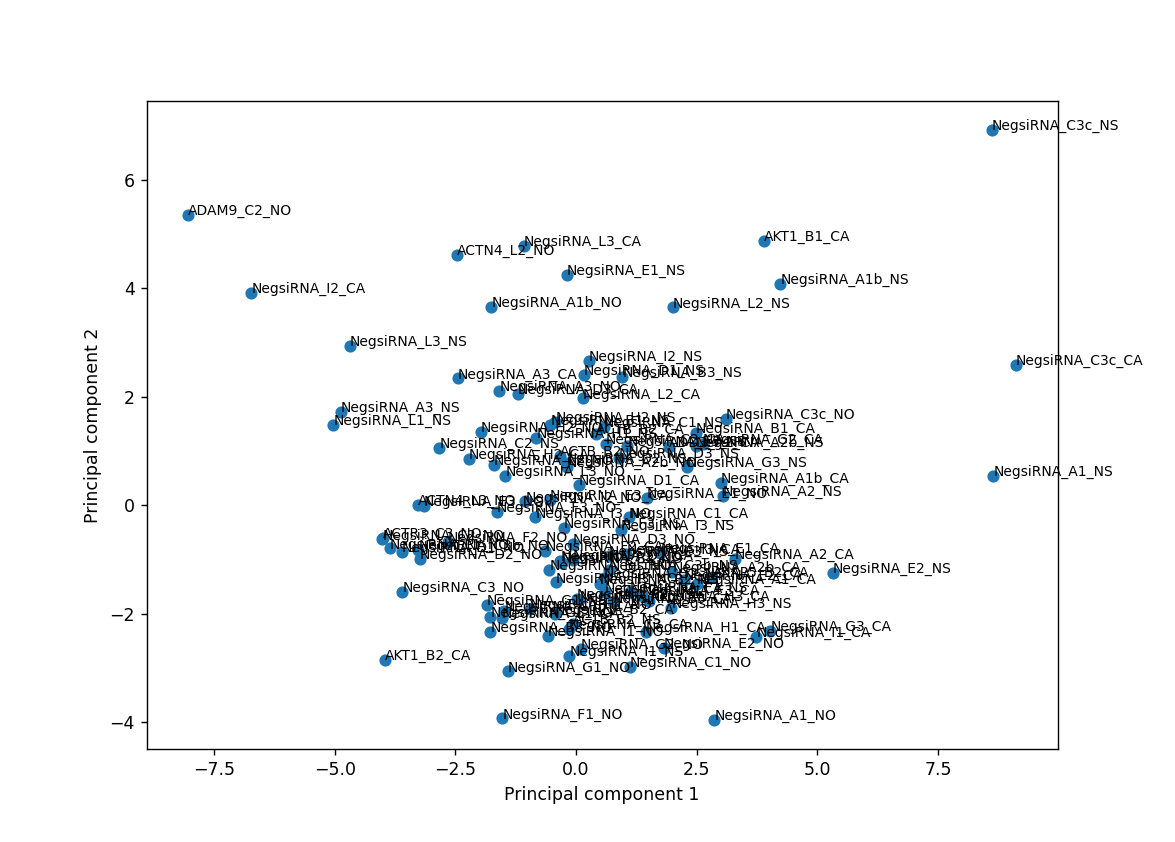

In [23]:
all_pca_array = all_pipe.transform(data_all)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(all_pca_array[:, 0], all_pca_array[:, 1])

labels = list(df_all.index)

for index, label in enumerate(labels):
    ax.text(all_pca_array[index, 0], all_pca_array[index, 1], label, fontsize=8)

<IPython.core.display.Javascript object>


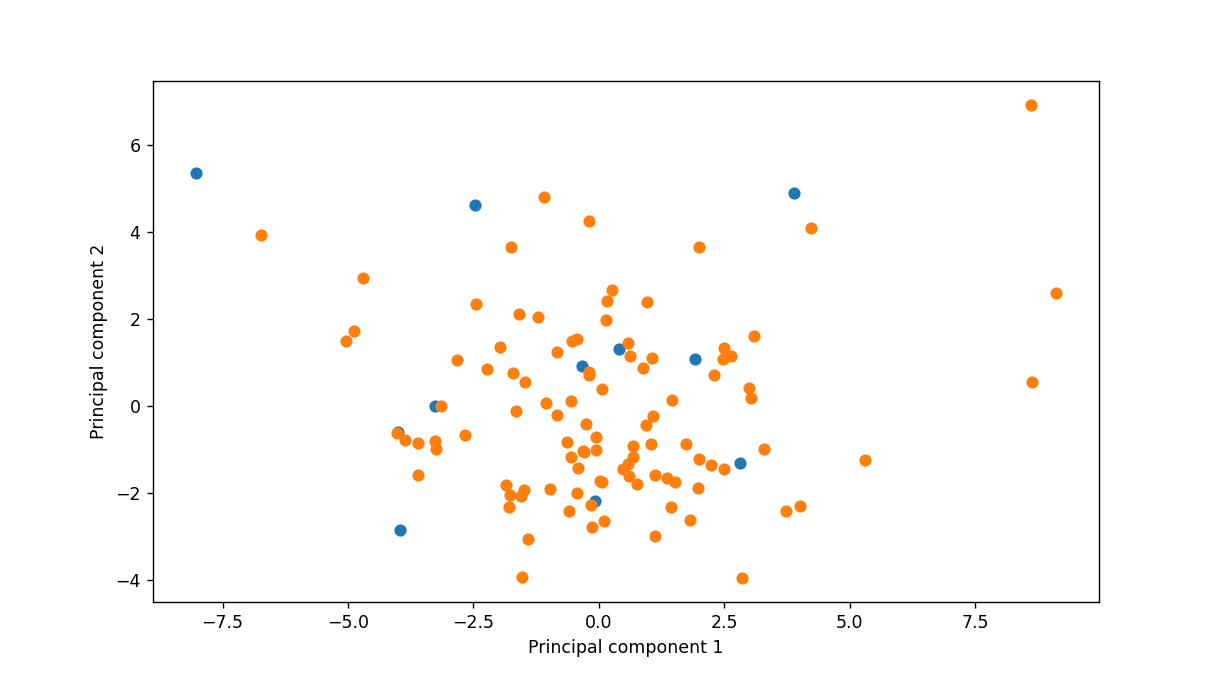

In [25]:
data_first_nonegsi = df_first_nonegsi.fillna(0).to_numpy()

data_first_nonegsi_pca_array = all_pipe.transform(data_first_nonegsi)
data_negsi_pca_array = all_pipe.transform(data_negsi)

fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(data_first_nonegsi_pca_array[:, 0], data_first_nonegsi_pca_array[:, 1])
plt.scatter(data_negsi_pca_array[:, 0], data_negsi_pca_array[:, 1])


In [57]:
df_ca = df_negsi_0[df_negsi_0.index.str[-2:] == 'CA']
df_no = df_negsi_0[df_negsi_0.index.str[-2:] == 'NO']
df_ns = df_negsi_0[df_negsi_0.index.str[-2:] == 'NS']

In [58]:
df_ca

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,69.758472,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,55.310388,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,56.647236,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574
NegsiRNA_H1_CA,0.602399,0.953576,1,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,290,...,58.941502,42.297676,54.304086,38.232718,0.932609,0.032884,1629,5,3.113567,0.319213
NegsiRNA_A2_CA,0.689019,0.782898,2,1.414214,0.000000,1.414214,0.000000,1.000000,0.000000,323,...,57.591560,45.436266,53.172569,41.556212,0.932721,0.033391,1430,5,3.121678,0.331164
NegsiRNA_I1_CA,0.555832,0.991444,5,8.194113,13.968824,7.439371,12.382233,0.963544,0.051405,245,...,62.221554,39.326028,57.569143,35.896054,0.932593,0.029063,1563,5,3.125400,0.333098
NegsiRNA_B1_CA,0.617043,0.760328,4,19.346194,14.521293,17.558846,13.536958,0.923591,0.066001,275,...,58.519538,43.569723,53.848854,39.844243,0.927941,0.038266,1499,5,3.143429,0.369052
NegsiRNA_H3_CA,0.621256,0.920652,2,1.207107,0.292893,1.207107,0.292893,1.000000,0.000000,233,...,60.856626,38.925879,56.306358,35.507359,0.933722,0.032442,1654,5,3.130593,0.345809
NegsiRNA_D2_CA,0.646660,0.828571,3,21.094757,31.356988,16.970341,24.217995,0.928001,0.124706,323,...,56.226481,40.245998,51.747099,36.330398,0.931177,0.034809,1756,5,3.121298,0.333378
NegsiRNA_A1b_CA,0.695802,0.683000,1,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,276,...,61.515650,46.730976,56.405662,42.231417,0.928983,0.037013,1424,5,3.122893,0.332565


In [59]:
df_no

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_E3_NO,0.583298,0.893483,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,446,...,48.109712,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568
NegsiRNA_H3_NO,0.607595,0.993972,1,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,376,...,52.994788,37.888707,49.081330,34.585336,0.934972,0.034083,1850,5,3.139459,0.358691
NegsiRNA_B1_NO,0.578247,1.002693,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,337,...,54.868262,37.261451,50.692851,33.879977,0.933472,0.033616,1891,5,3.135907,0.357789
NegsiRNA_C2_NO,0.546635,0.934263,6,11.730796,14.428636,10.582516,13.008167,0.930924,0.097946,528,...,45.948125,34.999126,42.249827,31.516999,0.931476,0.035122,2286,5,3.122922,0.337545
NegsiRNA_I1_NO,0.520791,1.064306,3,2.885618,3.265986,2.801041,3.119495,0.987295,0.022006,363,...,54.355770,38.327328,50.023571,34.281613,0.932318,0.036678,1763,5,3.123653,0.332613
NegsiRNA_A2_NO,0.539120,0.834417,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,382,...,54.123812,41.048925,49.652452,36.875332,0.930089,0.036456,1808,5,3.122788,0.334867
NegsiRNA_B2_NO,0.526154,0.989282,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,370,...,54.667199,40.535948,50.285947,36.541507,0.931676,0.041824,1714,5,3.138856,0.354132
NegsiRNA_L1_NO,0.575542,0.975456,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,432,...,49.175906,33.742520,45.241584,30.278644,0.932223,0.036744,2405,5,3.125572,0.336348
NegsiRNA_B3_NO,0.522708,1.044949,3,1.471405,0.502447,1.471405,0.502447,1.000000,0.000000,379,...,52.359681,36.054798,48.321007,32.692994,0.933084,0.033829,2016,5,3.127480,0.340865
NegsiRNA_F2_NO,0.603425,0.869404,4,2.000000,1.414214,2.000000,1.414214,1.000000,0.000000,475,...,47.227580,37.436552,43.591167,34.149162,0.933511,0.036291,1972,5,3.120183,0.326731


In [61]:
df_ns

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_mean,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,52.991063,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363
NegsiRNA_G3_NS,0.663615,0.718517,1,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,261,...,64.834604,45.261552,59.467085,40.739602,0.927493,0.040588,1432,5,3.121508,0.341351
NegsiRNA_F3_NS,0.620336,0.844835,3,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,373,...,52.987835,39.386224,48.840667,35.773478,0.932481,0.041023,1680,5,3.127976,0.337608
NegsiRNA_D1_NS,0.657097,0.752369,5,6.345584,10.122058,5.605948,8.483318,0.969579,0.068022,308,...,56.269763,41.015448,51.514172,36.682412,0.927774,0.038939,1910,6,3.137173,0.351557
NegsiRNA_G1_NS,0.589114,0.992638,3,20.932997,16.516946,18.803606,14.496088,0.911181,0.051418,278,...,55.479033,34.614306,51.406594,31.689208,0.934441,0.041037,1990,5,3.120101,0.328156
NegsiRNA_C2_NS,0.590744,0.921342,11,2.028519,1.011014,2.002055,0.943904,0.994005,0.019884,428,...,49.287711,37.211670,45.235530,33.524566,0.930461,0.037944,2176,5,3.140625,0.356768
NegsiRNA_F2_NS,0.570446,0.920979,2,25.642136,32.849242,22.518969,28.684353,0.901020,0.035624,402,...,53.119174,38.673171,49.007335,35.074372,0.932672,0.034901,1699,5,3.128899,0.343759
NegsiRNA_A2_NS,0.673425,0.676530,4,2.853553,2.267813,2.853553,2.267813,1.000000,0.000000,254,...,62.646880,40.799313,57.681321,37.145793,0.928652,0.031755,1559,5,3.136626,0.347167
NegsiRNA_A2b_NS,0.630537,0.724373,1,2.414214,0.000000,2.236068,0.000000,0.926210,0.000000,247,...,65.203432,46.043375,59.844705,41.189162,0.929429,0.034394,1521,5,3.138725,0.356889
NegsiRNA_E3_NS,0.659557,0.634111,1,1.414214,0.000000,1.414214,0.000000,1.000000,0.000000,290,...,59.209025,43.365681,54.238794,38.876081,0.928800,0.038192,1641,5,3.125533,0.336795


In [68]:
df_ml = df_negsi_0.copy()
labels = {'NS': 0, 'NO': 1, 'CA': 2}
df_ml['label'] = df_ml.index.map(lambda x: labels[x[-2:]])


In [69]:
df_ml

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std,label
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235,2
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116,2
NegsiRNA_E3_NO,0.583298,0.893483,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,446,...,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568,1
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363,0
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333,2
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572,1
NegsiRNA_I2_CA,0.600133,0.941587,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507,...,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674,2
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654,0
